In [ ]:


# #importing the required libraries
# import cv2
# import dlib

# #capture the video from default camera 
# webcam_video_stream = cv2.VideoCapture('images/testing/modi.mp4')

# #load the pretrained HOG SVN model
# face_detection_classifier = dlib.get_frontal_face_detector()

# # download the trained facial shape predictor from
# # http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
# # load shape predictor to predict face landmark points of individual facial structures
# face_shape_predictor = dlib.shape_predictor('models/shape_predictor_5_face_landmarks.dat')

# #initialize the array variable to hold all face locations in the frame
# all_face_locations = []

# #loop through every frame in the video
# while True:
#     # object to hold the 5 face landmark points for every face
#     face_landmarks = dlib.full_object_detections()
#     #get the current frame from the video stream as an image
#     ret,current_frame = webcam_video_stream.read()

#     #detect all face locations using the HOG SVN classifier
#     all_face_locations = face_detection_classifier(current_frame,1)    
#     #looping through the face locations
#     for index,current_face_location in enumerate(all_face_locations):
#         #looping through all face detections and append shape predictions
#         face_landmarks.append(face_shape_predictor(current_frame, current_face_location))
    
#     # optional arguments eg: dlib.get_face_chips(image_to_detect, face_landmarks, size=160, padding=0.25)
#     all_face_chips = dlib.get_face_chips(current_frame,face_landmarks) 
    
#     #loop through the face chips and show them
#     for index,current_face_chip in enumerate(all_face_chips):
#         #show the face chip
#         cv2.imshow("Face no "+str(index+1),current_face_chip)
    
#     #showing the current face with rectangle drawn
#     cv2.imshow("Webcam Video",current_frame)
    
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# #release the stream and cam
# #close all opencv windows open
# webcam_video_stream.release()
# cv2.destroyAllWindows()        












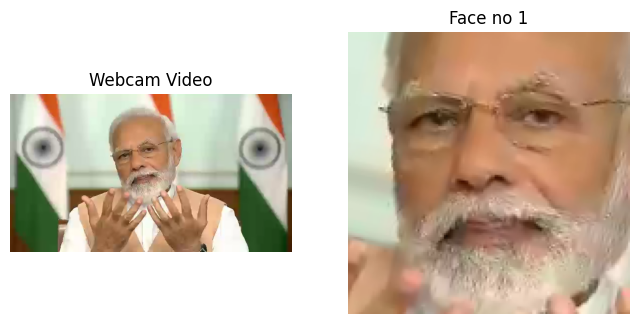

Video processing completed!


In [1]:
#importing the required libraries
import cv2
import dlib
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

%matplotlib inline

#capture the video from default camera 
webcam_video_stream = cv2.VideoCapture('images/testing/modi.mp4')
#load the pretrained HOG SVN model
face_detection_classifier = dlib.get_frontal_face_detector()
# download the trained facial shape predictor from
# http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
# load shape predictor to predict face landmark points of individual facial structures
face_shape_predictor = dlib.shape_predictor('models/shape_predictor_5_face_landmarks.dat')
#initialize the array variable to hold all face locations in the frame
all_face_locations = []

#loop through every frame in the video
while True:
    # object to hold the 5 face landmark points for every face
    face_landmarks = dlib.full_object_detections()
    #get the current frame from the video stream as an image
    ret,current_frame = webcam_video_stream.read()
    
    #break if no frame returned (end of video)
    if not ret:
        break
    
    #detect all face locations using the HOG SVN classifier
    all_face_locations = face_detection_classifier(current_frame,1)    
    #looping through the face locations
    for index,current_face_location in enumerate(all_face_locations):
        #looping through all face detections and append shape predictions
        face_landmarks.append(face_shape_predictor(current_frame, current_face_location))
    
    # optional arguments eg: dlib.get_face_chips(image_to_detect, face_landmarks, size=160, padding=0.25)
    all_face_chips = dlib.get_face_chips(current_frame,face_landmarks) 
    
    #create figure for displaying video and face chips
    num_faces = len(all_face_chips)
    fig, axes = plt.subplots(1, num_faces + 1, figsize=(4 * (num_faces + 1), 4))
    
    #handle case when only one subplot
    if num_faces == 0:
        axes = [axes]
    
    #show main video frame
    axes[0].imshow(cv2.cvtColor(current_frame, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Webcam Video")
    axes[0].axis('off')
    
    #loop through the face chips and show them
    for index,current_face_chip in enumerate(all_face_chips):
        axes[index + 1].imshow(cv2.cvtColor(current_face_chip, cv2.COLOR_BGR2RGB))
        axes[index + 1].set_title("Face no " + str(index+1))
        axes[index + 1].axis('off')
    
    clear_output(wait=True)
    display(fig)
    plt.close(fig)

#release the stream and cam
webcam_video_stream.release()
print("Video processing completed!")